In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Text(0, 0.5, 'y dataset')

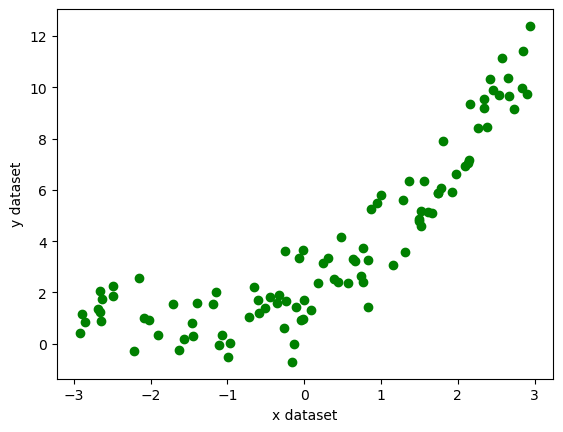

In [201]:
x=6*np.random.rand(100,1)-3
y=0.5 * x**2 +1.5*x+2+np.random.randn(100,1)
plt.scatter(x,y,color="g")
plt.xlabel("x dataset")
plt.ylabel("y dataset")

In [202]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [203]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

In [204]:
# no need to do scaling
regression.fit(x_train,y_train)

LinearRegression()

In [205]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression.predict(x_test))
print(score)

0.7832912614345384


Text(0, 0.5, 'y dataset')

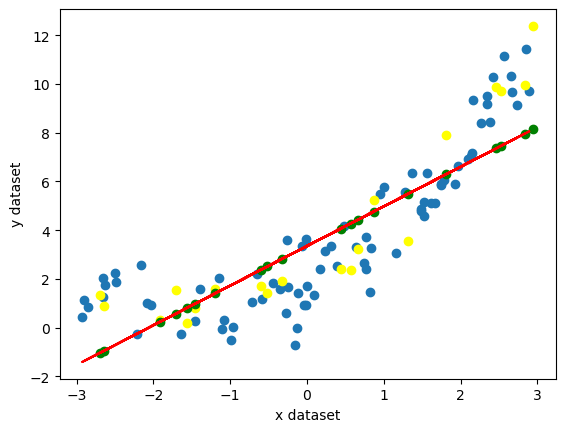

In [206]:
# visualize error
plt.plot(x_train,regression.predict(x_train),color="red")
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test,color="yellow")
plt.scatter(x_test,regression.predict(x_test),color="green")

plt.xlabel("x dataset")
plt.ylabel("y dataset")
         

* we are getting wide scattered data leading to huge error
* lets apply polynomial transformation

In [207]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
#hO(x)=b0*1 + b1x1 + b2(x1)square

In [208]:
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [209]:
x_train_poly
x_test_poly


array([[ 1.        ,  1.30973964,  1.71541792],
       [ 1.        , -0.32971075,  0.10870918],
       [ 1.        ,  2.46156605,  6.05930744],
       [ 1.        ,  0.65850479,  0.43362856],
       [ 1.        , -2.68917546,  7.23166463],
       [ 1.        , -1.70641716,  2.91185951],
       [ 1.        ,  1.80516436,  3.25861836],
       [ 1.        , -1.90846176,  3.6422263 ],
       [ 1.        ,  0.43971718,  0.1933512 ],
       [ 1.        ,  0.86580365,  0.74961597],
       [ 1.        , -0.6049241 ,  0.36593316],
       [ 1.        , -0.51599444,  0.26625026],
       [ 1.        , -1.19255773,  1.42219394],
       [ 1.        , -2.64578703,  7.000189  ],
       [ 1.        ,  2.83778294,  8.05301201],
       [ 1.        ,  0.56674938,  0.32120486],
       [ 1.        , -1.46258052,  2.13914179],
       [ 1.        ,  2.9451941 ,  8.67416832],
       [ 1.        , -1.56451141,  2.44769594],
       [ 1.        ,  2.53060074,  6.40394012]])

In [210]:
print(f"previous score :{score}")

from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(f"new score  :{score}")

previous score :0.7832912614345384
new score  :0.9555783739084267


In [211]:
print(regression.intercept_)
print(regression.coef_)

[1.86035195]
[[0.         1.60343697 0.53038873]]


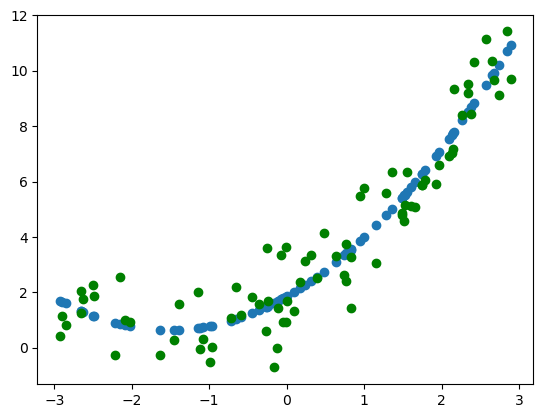

In [212]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train,color="green")

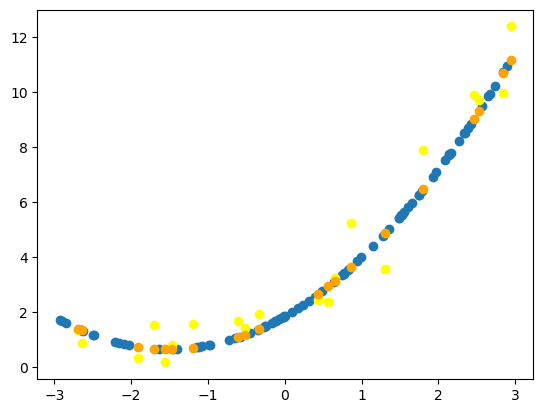

In [213]:
# lets see our test data
plt.scatter(x_train,regression.predict(x_train_poly))
# plt.scatter(x_train,y_train,color="green")
plt.scatter(x_test,y_test,color="yellow")  #original
plt.scatter(x_test,regression.predict(x_test_poly),color="orange") #predicted

In [214]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
# predicion of new data
x_new=np.linspace(-3,3,200).reshape(200,1)
# output=b0+b1x1
# we used degree=2
# output=b0+b1x1+b2x1^2+b3x1^3
# need to tranform input first
x_new_poly=poly.transform(x_new)
print(f"new data:{x_new}")
print(f"after poly:{x_new_poly}")


new data:[[-3.        ]
 [-2.96984925]
 [-2.93969849]
 [-2.90954774]
 [-2.87939698]
 [-2.84924623]
 [-2.81909548]
 [-2.78894472]
 [-2.75879397]
 [-2.72864322]
 [-2.69849246]
 [-2.66834171]
 [-2.63819095]
 [-2.6080402 ]
 [-2.57788945]
 [-2.54773869]
 [-2.51758794]
 [-2.48743719]
 [-2.45728643]
 [-2.42713568]
 [-2.39698492]
 [-2.36683417]
 [-2.33668342]
 [-2.30653266]
 [-2.27638191]
 [-2.24623116]
 [-2.2160804 ]
 [-2.18592965]
 [-2.15577889]
 [-2.12562814]
 [-2.09547739]
 [-2.06532663]
 [-2.03517588]
 [-2.00502513]
 [-1.97487437]
 [-1.94472362]
 [-1.91457286]
 [-1.88442211]
 [-1.85427136]
 [-1.8241206 ]
 [-1.79396985]
 [-1.7638191 ]
 [-1.73366834]
 [-1.70351759]
 [-1.67336683]
 [-1.64321608]
 [-1.61306533]
 [-1.58291457]
 [-1.55276382]
 [-1.52261307]
 [-1.49246231]
 [-1.46231156]
 [-1.4321608 ]
 [-1.40201005]
 [-1.3718593 ]
 [-1.34170854]
 [-1.31155779]
 [-1.28140704]
 [-1.25125628]
 [-1.22110553]
 [-1.19095477]
 [-1.16080402]
 [-1.13065327]
 [-1.10050251]
 [-1.07035176]
 [-1.04020101]
 

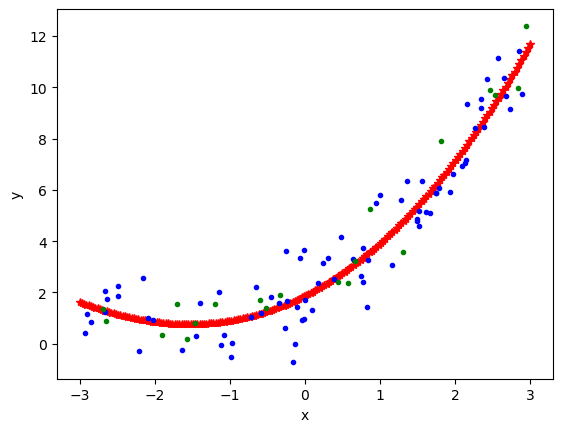

In [220]:
y_new=regression.predict(x_new_poly)
plt.plot(x_new,y_new,"r*",linewidth=2,label="predictions")
plt.plot(x_train,y_train,"b.",label="training points")
plt.plot(x_test,y_test,"g.",label="testing points")
# plt.plot(x_train,regression.predict(x_train_poly),"g.",label="testing points")
plt.xlabel("x")
plt.ylabel("y")
plt.show()